# Groundwater Availability Prediction

#### Dataset information:

This data is from the National Compilation on DYNAMIC GROUND WATER RESOURCES OF INDIA 2020, 2022, 2023. Groundwater resource data for 8 states has been compiled into one dataset. Each dataset has the following variables, (variables (except 1, 15 & 16) are measured in bcm (billion cubic meter)):

1. Name of District
2. Monsoon season recharge from rainfall
3. Monsoon season recharge from other sources: canal seepage, return flow from irrigation, recharge from tanks, ponds and water conservation structures taken together
4. Non-monsoon season recharge from rainfall
5. Non-monsoon season recharge from other sources
6. Total annual groundwater recharge
7. Total Natural Discharges
8. Annual Extractable Groundwater Resource
9. Irrigation - Annual extraction
10. Industrial - Annual extraction
11. Domestic - Annual Extraction
12. Total Annual Extraction
13. Annual GW Allocation for domestic use (2025)
14. Net GW availability for future
15. Stage of GW extraction (%)- Percentage of the ratio of ‘Existing Gross GW Extraction for all uses’ to ‘Annual Extractable GW Resources’
16. State: This has been feature engineered
17. Year: This has been feature engineered

#### Data Loading, Inspection & Preprocessing

In [231]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import datetime as dt

from sklearn.preprocessing import StandardScaler

from numpy.linalg import eig

from sklearn.decomposition import PCA

import sys 
import warnings
if not sys.warnoptions: 
    warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)

In [232]:
import os
os.chdir(r"D:\OneDrive\Documents\Course\Imarticus Learning\ML ADVANCED\Ensembling modelling\Projects\Groundwater")

# Importing 2023 files
DL23_data = pd.read_csv("Delhi 23.csv")
GA23_data = pd.read_csv("Goa 23.csv")
GJ23_data = pd.read_csv("Guj 23.csv")
KA23_data = pd.read_csv("Ktaka 23.csv")
MH23_data = pd.read_csv("Maha 23.csv")
TS23_data = pd.read_csv("Tel 23.csv")
TN23_data = pd.read_csv("TN 23.csv")
WB23_data = pd.read_csv("WB 23.csv")


# Importing 2022 files
WB22_data = pd.read_csv("WB 22.csv")
UP22_data = pd.read_csv("UP 22.csv")
TN22_data = pd.read_csv("TN 22.csv")
TS22_data = pd.read_csv("TS 22.csv")
RJ22_data = pd.read_csv("RJ 22.csv")
PB22_data = pd.read_csv("PB 22.csv")
OD22_data = pd.read_csv("OD 22.csv")
MH22_data = pd.read_csv("MH 22.csv")
MP22_data = pd.read_csv("MP 22.csv")
KL22_data = pd.read_csv("KL 22.csv")
KA22_data = pd.read_csv("KA 22.csv")
GJ22_data = pd.read_csv("GJ 22.csv")
GA22_data = pd.read_csv("GA 22.csv")
DL22_data = pd.read_csv("DL 22.csv")
AS22_data = pd.read_csv("AS 22.csv")
BH22_data = pd.read_csv("Bihar 22.csv")
AP22_data = pd.read_csv("AP 22.csv")
HR22_data = pd.read_csv("HR 22.csv")


# Importing 2020 files
TS20_data = pd.read_csv("TS 20.csv")
KA20_data = pd.read_csv("KA 20.csv")
GJ20_data = pd.read_csv("GJ 20.csv")
GA20_data = pd.read_csv("Goa 20.csv")
DL20_data = pd.read_csv("DL 20.csv")
TN20_data = pd.read_csv("TN 20.csv")
MH20_data = pd.read_csv("MH 20.csv")

In [233]:
def add_state_year_cols(*dataframes, state_names, years):
   
    if len(dataframes) != len(state_names) or len(dataframes) != len(years):
        raise ValueError("Number of dataframes, state names, and years must be equal")
    
    modified_dfs = []
    
    for df, state, year in zip(dataframes, state_names, years):
        df_modified = df.copy()
        df_modified['State'] = state
        df_modified['Year'] = year
        modified_dfs.append(df_modified)
    
    return modified_dfs

In [234]:
#2023 files
states=['Delhi', 'Goa', 'Gujarat', 'Karnataka', 'Maharashtra', 'Telangana', 'Tamil Nadu', 'West Bengal']
year= [2023]*8

DL23_data, GA23_data, GJ23_data, KA23_data, MH23_data, TS23_data, TN23_data, WB23_data = add_state_year_cols(DL23_data, GA23_data, GJ23_data, KA23_data, MH23_data, TS23_data, TN23_data, WB23_data, state_names=states, years=year)

In [235]:
#2022 files

states_2022 = ['West Bengal', 'Uttar Pradesh', 'Tamil Nadu', 'Telangana', 
               'Rajasthan', 'Punjab', 'Odisha', 'Maharashtra', 'Madhya Pradesh',
               'Kerala', 'Karnataka', 'Gujarat', 'Goa', 'Delhi', 'Assam', 'Bihar', 'Andhra Pradesh', 'Haryana']
years_2022 = [2022] * 18

WB22_data, UP22_data, TN22_data, TS22_data, RJ22_data, PB22_data, OD22_data, MH22_data, MP22_data, KL22_data, KA22_data, GJ22_data, GA22_data, DL22_data, AS22_data,BH22_data, AP22_data, HR22_data = add_state_year_cols(
    WB22_data, UP22_data, TN22_data, TS22_data, RJ22_data, 
    PB22_data, OD22_data, MH22_data, MP22_data, KL22_data, 
    KA22_data, GJ22_data, GA22_data, DL22_data, AS22_data,BH22_data, AP22_data, HR22_data,
    state_names=states_2022,
    years=years_2022
)

In [236]:
#2020 files

states_2020 = ['Telangana', 'Karnataka', 'Gujarat', 'Goa', 'Delhi', 'Tamil Nadu', 'Maharashtra']
years_2020 = [2020] * 7

TS20_data, KA20_data, GJ20_data, GA20_data, DL20_data, TN20_data, MH20_data = add_state_year_cols(
    TS20_data, KA20_data, GJ20_data, GA20_data, DL20_data, TN20_data, MH20_data,
    state_names=states_2020,
    years=years_2020
)

In [237]:
df_list = [DL23_data, GA23_data, GJ23_data, KA23_data, MH23_data, TS23_data, TN23_data, WB23_data,
          WB22_data, UP22_data, TN22_data, TS22_data, RJ22_data, PB22_data, OD22_data, MH22_data, MP22_data, KL22_data, KA22_data, GJ22_data, GA22_data, DL22_data, AS22_data,BH22_data, AP22_data, HR22_data,
          TS20_data, KA20_data, GJ20_data, GA20_data, DL20_data, TN20_data, MH20_data]

def info_func(df):
    for dataframe in df:
        print('\nState:\n',dataframe['State'].unique())
        print('\nYear:\n',dataframe['Year'].unique())
        print(dataframe.info())

In [238]:
info_func(df_list)


State:
 ['Delhi']

Year:
 [2023]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   _id                                             14 non-null     int64  
 1   Sl. No                                          12 non-null     float64
 2   Name of District                                14 non-null     object 
 3   Monsoon season recharge from rainfall           14 non-null     float64
 4   Monsoon season recharge from other sources      14 non-null     float64
 5   Non-monsoon season recharge from rainfall       14 non-null     float64
 6   Non-monsoon season recharge from other sources  14 non-null     float64
 7   Total annual groundwater recharge               14 non-null     float64
 8   Total Natural Discharges                        14 non-null     float64
 9   Annual Extr

In [239]:
def rename_cols(df):
    for dataframe in df:
        dataframe.rename(columns={"Annual extraction - Irrigation": 'Irrigation - Annual extraction',
    "Annual extraction - Industrial": 'Industrial - Annual extraction',
    "Annual Extraction - Domestic": 'Domestic - Annual Extraction'}, inplace=True)
        print('\nState:\n',dataframe['State'].unique())
        print(dataframe.info())

In [240]:
rename_cols(df_list)


State:
 ['Delhi']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   _id                                             14 non-null     int64  
 1   Sl. No                                          12 non-null     float64
 2   Name of District                                14 non-null     object 
 3   Monsoon season recharge from rainfall           14 non-null     float64
 4   Monsoon season recharge from other sources      14 non-null     float64
 5   Non-monsoon season recharge from rainfall       14 non-null     float64
 6   Non-monsoon season recharge from other sources  14 non-null     float64
 7   Total annual groundwater recharge               14 non-null     float64
 8   Total Natural Discharges                        14 non-null     float64
 9   Annual Extractable Groundw

In [241]:
def col_names(df):
    for dataframe in df:
        print('\nState:\n',dataframe['State'].unique())
        print(dataframe.columns)

In [242]:
col_names(df_list)


State:
 ['Delhi']
Index(['_id', 'Sl. No', 'Name of District',
       'Monsoon season recharge from rainfall',
       'Monsoon season recharge from other sources',
       'Non-monsoon season recharge from rainfall',
       'Non-monsoon season recharge from other sources',
       'Total annual groundwater recharge', 'Total Natural Discharges',
       'Annual Extractable Groundwater Resource',
       'Irrigation - Annual extraction', 'Industrial - Annual extraction',
       'Domestic - Annual Extraction', 'Total Annual Extraction',
       'Annual GW Allocation for domestic use (2025)',
       'Net GW availability for future', 'Stage of GW extraction (%)', 'State',
       'Year'],
      dtype='object')

State:
 ['Goa']
Index(['_id', 'Sl. No', 'Name of District',
       'Monsoon season recharge from rainfall',
       'Monsoon season recharge from other sources',
       'Non-monsoon season recharge from rainfall',
       'Non-monsoon season recharge from other sources',
       'Total annual

In [243]:
def remove_total_rows(df):
    
    for raw_data in df:
        # Drop columns if they exist
        if '_id' in raw_data.columns:
            raw_data.drop('_id', axis=1, inplace=True)
        if 'Sl. No' in raw_data.columns:
            raw_data.drop('Sl. No', axis=1, inplace=True)
        else:
            print('Columns not removed')
    
 

 
    return raw_data

In [244]:
raw_data=remove_total_rows(df_list)

In [245]:
raw_data = pd.concat(df_list, ignore_index=True)
raw_data.head()

,Name of District,Monsoon season recharge from rainfall,Monsoon season recharge from other sources,Non-monsoon season recharge from rainfall,Non-monsoon season recharge from other sources,Total annual groundwater recharge,Total Natural Discharges,Annual Extractable Groundwater Resource,Irrigation - Annual extraction,Industrial - Annual extraction,Domestic - Annual Extraction,Total Annual Extraction,Annual GW Allocation for domestic use (2025),Net GW availability for future,Stage of GW extraction (%),State,Year
0,Central,248.00,704.60,105.61,1393.29,2451.50,245.15,2206.35,244.79,0.00,1496.18,1740.96,2087.35,487.11,78.91,Delhi,2023
1,East,84.21,508.93,41.13,1001.76,1636.03,163.62,1472.41,110.55,0.20,1282.15,1392.91,1439.42,79.50,94.60,Delhi,2023
2,Nazul Land,224.11,65.89,109.46,110.43,509.89,50.99,458.9,228.00,0.00,86.04,314.04,86.04,144.86,68.43,Delhi,2023
3,New Delhi,660.52,653.90,353.23,1245.39,2913.04,291.30,2621.74,686.87,2.20,2923.44,3612.52,2923.45,0.00,137.79,Delhi,2023
4,North,1629.66,819.07,636.08,1590.90,4675.71,467.57,4208.14,489.77,50.31,4052.92,4592.99,4084.62,208.08,109.15,Delhi,2023


In [246]:
values_to_remove = ['Total (Ham)', 'Total (Bcm)', 'Total(Ham)']
raw_data = raw_data[~raw_data['Name of District'].isin(values_to_remove)]

In [247]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931 entries, 0 to 994
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Name of District                                931 non-null    object 
 1   Monsoon season recharge from rainfall           929 non-null    float64
 2   Monsoon season recharge from other sources      929 non-null    float64
 3   Non-monsoon season recharge from rainfall       929 non-null    float64
 4   Non-monsoon season recharge from other sources  929 non-null    float64
 5   Total annual groundwater recharge               929 non-null    float64
 6   Total Natural Discharges                        931 non-null    float64
 7   Annual Extractable Groundwater Resource         931 non-null    object 
 8   Irrigation - Annual extraction                  931 non-null    float64
 9   Industrial - Annual extraction                  

In [248]:
raw_data['Annual Extractable Groundwater Resource']=pd.to_numeric(raw_data['Annual Extractable Groundwater Resource'],errors='coerce')
raw_data['Year']=pd.to_datetime(raw_data['Year'], format='%Y')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931 entries, 0 to 994
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Name of District                                931 non-null    object        
 1   Monsoon season recharge from rainfall           929 non-null    float64       
 2   Monsoon season recharge from other sources      929 non-null    float64       
 3   Non-monsoon season recharge from rainfall       929 non-null    float64       
 4   Non-monsoon season recharge from other sources  929 non-null    float64       
 5   Total annual groundwater recharge               929 non-null    float64       
 6   Total Natural Discharges                        931 non-null    float64       
 7   Annual Extractable Groundwater Resource         931 non-null    float64       
 8   Irrigation - Annual extraction                  931 non

In [249]:
def replace_null_values(df,cols):
    for column in cols:
        dtype=df[column].dtype
        if dtype in ['int64','float64']:
            df[column].fillna(df[column].mean(), inplace=True)
        elif dtype in ['object','bool']:
            df[column].fillna(df[column].mode().iloc[0], inplace=True)
        else:
            return print('Datatype is:', dtype)
    return print('Total null values in each column:\n\n',df.isnull().sum())

In [250]:
raw_data.columns

Index(['Name of District', 'Monsoon season recharge from rainfall',
       'Monsoon season recharge from other sources',
       'Non-monsoon season recharge from rainfall',
       'Non-monsoon season recharge from other sources',
       'Total annual groundwater recharge', 'Total Natural Discharges',
       'Annual Extractable Groundwater Resource',
       'Irrigation - Annual extraction', 'Industrial - Annual extraction',
       'Domestic - Annual Extraction', 'Total Annual Extraction',
       'Annual GW Allocation for domestic use (2025)',
       'Net GW availability for future', 'Stage of GW extraction (%)', 'State',
       'Year'],
      dtype='object')

In [251]:
cols= ['Monsoon season recharge from rainfall',
       'Monsoon season recharge from other sources',
       'Non-monsoon season recharge from rainfall',
       'Non-monsoon season recharge from other sources',
       'Total annual groundwater recharge',
       'Annual Extractable Groundwater Resource',
       'Irrigation - Annual extraction',
       'Annual GW Allocation for domestic use (2025)',
       'Net GW availability for future']
replace_null_values(raw_data,cols)

Total null values in each column:

 Name of District                                  0
Monsoon season recharge from rainfall             0
Monsoon season recharge from other sources        0
Non-monsoon season recharge from rainfall         0
Non-monsoon season recharge from other sources    0
Total annual groundwater recharge                 0
Total Natural Discharges                          0
Annual Extractable Groundwater Resource           0
Irrigation - Annual extraction                    0
Industrial - Annual extraction                    0
Domestic - Annual Extraction                      0
Total Annual Extraction                           0
Annual GW Allocation for domestic use (2025)      0
Net GW availability for future                    0
Stage of GW extraction (%)                        0
State                                             0
Year                                              0
dtype: int64


In [252]:
raw_data.describe(percentiles=[0.01,0.02,.03,.04,.05,.25,.50,.90,.95,.96,.97,.98,.99]).style.background_gradient()

,Monsoon season recharge from rainfall,Monsoon season recharge from other sources,Non-monsoon season recharge from rainfall,Non-monsoon season recharge from other sources,Total annual groundwater recharge,Total Natural Discharges,Annual Extractable Groundwater Resource,Irrigation - Annual extraction,Industrial - Annual extraction,Domestic - Annual Extraction,Total Annual Extraction,Annual GW Allocation for domestic use (2025),Net GW availability for future,Stage of GW extraction (%),Year
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931
mean,39105.178127,13819.401841,3578.640484,15141.942045,71656.144553,5902.337390,65327.178722,35149.231504,463.126294,3840.985897,39454.314200,5129.680999,31247.366531,66.297325,2021-10-31 15:29:34.865735936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1448.810000,0.000000,0.000000,2020-01-01 00:00:00
1%,189.672000,145.062000,0.000000,162.403000,1706.683000,161.653000,1454.833000,2.688000,0.000000,62.267000,659.298000,62.820000,0.000000,3.350000,2020-01-01 00:00:00
2%,469.448000,191.316000,0.000000,450.780000,2667.770000,239.326000,2153.934000,202.806000,0.000000,191.656000,1601.014000,226.610000,0.000000,7.246000,2020-01-01 00:00:00
3%,1060.515000,289.244000,0.000000,718.711000,3916.847000,366.377000,3441.141000,248.759000,0.000000,296.741000,1987.271000,480.991000,0.000000,10.234000,2020-01-01 00:00:00
4%,2340.712000,396.040000,0.000000,952.552000,5259.646000,501.790000,4516.074000,489.770000,0.000000,395.596000,2628.674000,549.698000,0.000000,14.820000,2020-01-01 00:00:00
5%,4540.050000,498.300000,0.000000,1044.280000,9877.295000,770.335000,8779.485000,672.710000,0.000000,452.350000,3223.695000,696.720000,0.875000,17.200000,2020-01-01 00:00:00
25%,17456.610000,3169.395000,85.860000,5051.135000,39591.725000,3314.170000,36100.265000,14561.970000,2.110000,1545.865000,17563.665000,1926.900000,9169.060000,38.125000,2022-01-01 00:00:00
50%,30658.830000,8505.410000,1463.960000,10898.850000,64962.730000,5346.540000,58981.780000,27698.900000,72.040000,2819.400000,32204.850000,3191.600000,24544.090000,57.560000,2022-01-01 00:00:00


In [253]:
high_GW = raw_data[raw_data['Net GW availability for future'] > 0.4 * 1e6]

high_GW

,Name of District,Monsoon season recharge from rainfall,Monsoon season recharge from other sources,Non-monsoon season recharge from rainfall,Non-monsoon season recharge from other sources,Total annual groundwater recharge,Total Natural Discharges,Annual Extractable Groundwater Resource,Irrigation - Annual extraction,Industrial - Annual extraction,Domestic - Annual Extraction,Total Annual Extraction,Annual GW Allocation for domestic use (2025),Net GW availability for future,Stage of GW extraction (%),State,Year
242,Uttar Dinajpur,74423.03,4583.94,11262.64,11852.45,102122.06,9400.57,92721.49,39375.1,708.33,7846.5,47929.92,8742.16,1128676.9,51.69,West Bengal,2022-01-01


In [254]:
WB_GW = raw_data[raw_data['State'] == 'West Bengal']

WB_GW

,Name of District,Monsoon season recharge from rainfall,Monsoon season recharge from other sources,Non-monsoon season recharge from rainfall,Non-monsoon season recharge from other sources,Total annual groundwater recharge,Total Natural Discharges,Annual Extractable Groundwater Resource,Irrigation - Annual extraction,Industrial - Annual extraction,Domestic - Annual Extraction,Total Annual Extraction,Annual GW Allocation for domestic use (2025),Net GW availability for future,Stage of GW extraction (%),State,Year
197,Alipurduar,108380.760000,1129.370000,21452.150000,3720.790000,134683.070000,13468.33,121214.74,9366.10,161.99,3386.22,12914.32,3688.97,107997.67,10.65,West Bengal,2023-01-01
198,Bankura,108112.580000,16418.210000,24870.580000,28068.080000,177469.450000,14751.93,162717.52,50234.50,281.43,8620.58,59136.55,8983.35,104012.51,36.34,West Bengal,2023-01-01
199,Birbhum,79139.980000,8698.590000,15231.270000,16682.040000,119751.880000,10960.74,108791.14,24501.50,1306.14,8439.61,34247.24,8967.96,74015.57,31.48,West Bengal,2023-01-01
200,Dakshin Dinajpur,65498.560000,9179.630000,12931.900000,25943.200000,113553.290000,10101.86,103451.43,58067.80,172.93,3926.17,62166.92,4075.12,41135.56,60.09,West Bengal,2023-01-01
201,Darjiling,34042.060000,669.290000,6278.830000,995.720000,41985.900000,4198.60,37787.30,2132.70,420.92,3359.09,5912.72,3731.61,31502.07,15.65,West Bengal,2023-01-01
202,Haora,15818.410000,896.760000,3325.090000,1399.020000,21439.280000,1752.75,19686.52,1248.00,340.90,2652.56,4241.47,3101.86,14995.76,21.55,West Bengal,2023-01-01
203,Hugli,80826.030000,9604.440000,16644.650000,23542.430000,130617.550000,12664.68,117952.86,50788.60,2078.09,10516.29,63382.98,11180.20,54252.89,53.74,West Bengal,2023-01-01
204,Jalpaiguri,147175.460000,1952.770000,30717.680000,5401.850000,185247.760000,18524.78,166722.97,12700.50,1482.43,6249.22,20432.12,8768.07,143772.01,12.26,West Bengal,2023-01-01
205,Jhargram,74041.160000,4441.660000,15109.920000,9454.550000,103047.290000,7819.31,95227.98,20429.60,250.50,2791.08,23471.17,2909.91,71637.98,24.65,West Bengal,2023-01-01
206,Kalimpong,3156.890000,189.210000,473.470000,98.370000,3917.940000,391.80,3526.14,0.00,2.45,62.33,64.77,62.82,3460.88,1.84,West Bengal,2023-01-01


In [255]:
raw_data.reset_index(inplace=True, drop=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Name of District                                931 non-null    object        
 1   Monsoon season recharge from rainfall           931 non-null    float64       
 2   Monsoon season recharge from other sources      931 non-null    float64       
 3   Non-monsoon season recharge from rainfall       931 non-null    float64       
 4   Non-monsoon season recharge from other sources  931 non-null    float64       
 5   Total annual groundwater recharge               931 non-null    float64       
 6   Total Natural Discharges                        931 non-null    float64       
 7   Annual Extractable Groundwater Resource         931 non-null    float64       
 8   Irrigation - Annual extraction                  93

#### EDA & Outlier Treatment

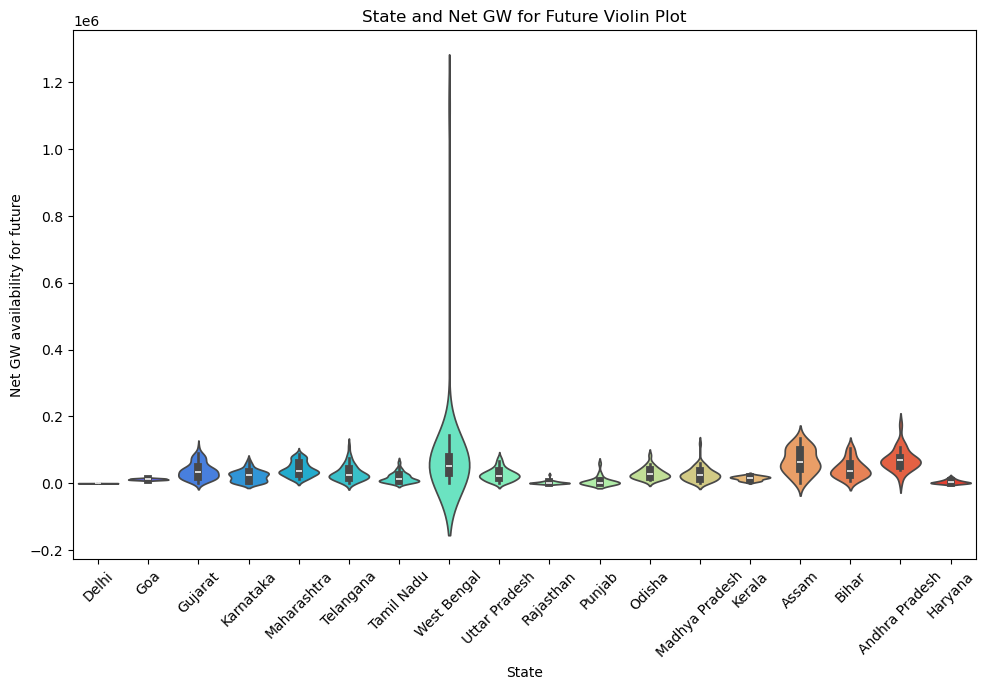

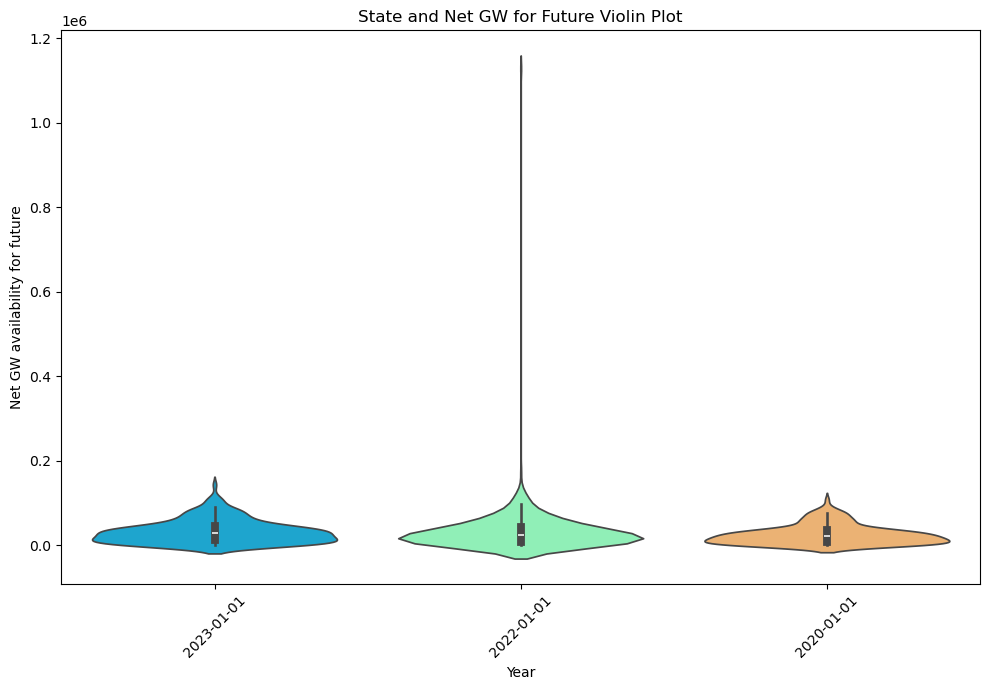

In [256]:
cols=['State', 'Year']

for column in cols:
    plt.figure(figsize=(10,7))
    sns.violinplot(x=column, y='Net GW availability for future', data=raw_data, palette='rainbow')
    plt.title('State and Net GW for Future Violin Plot')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

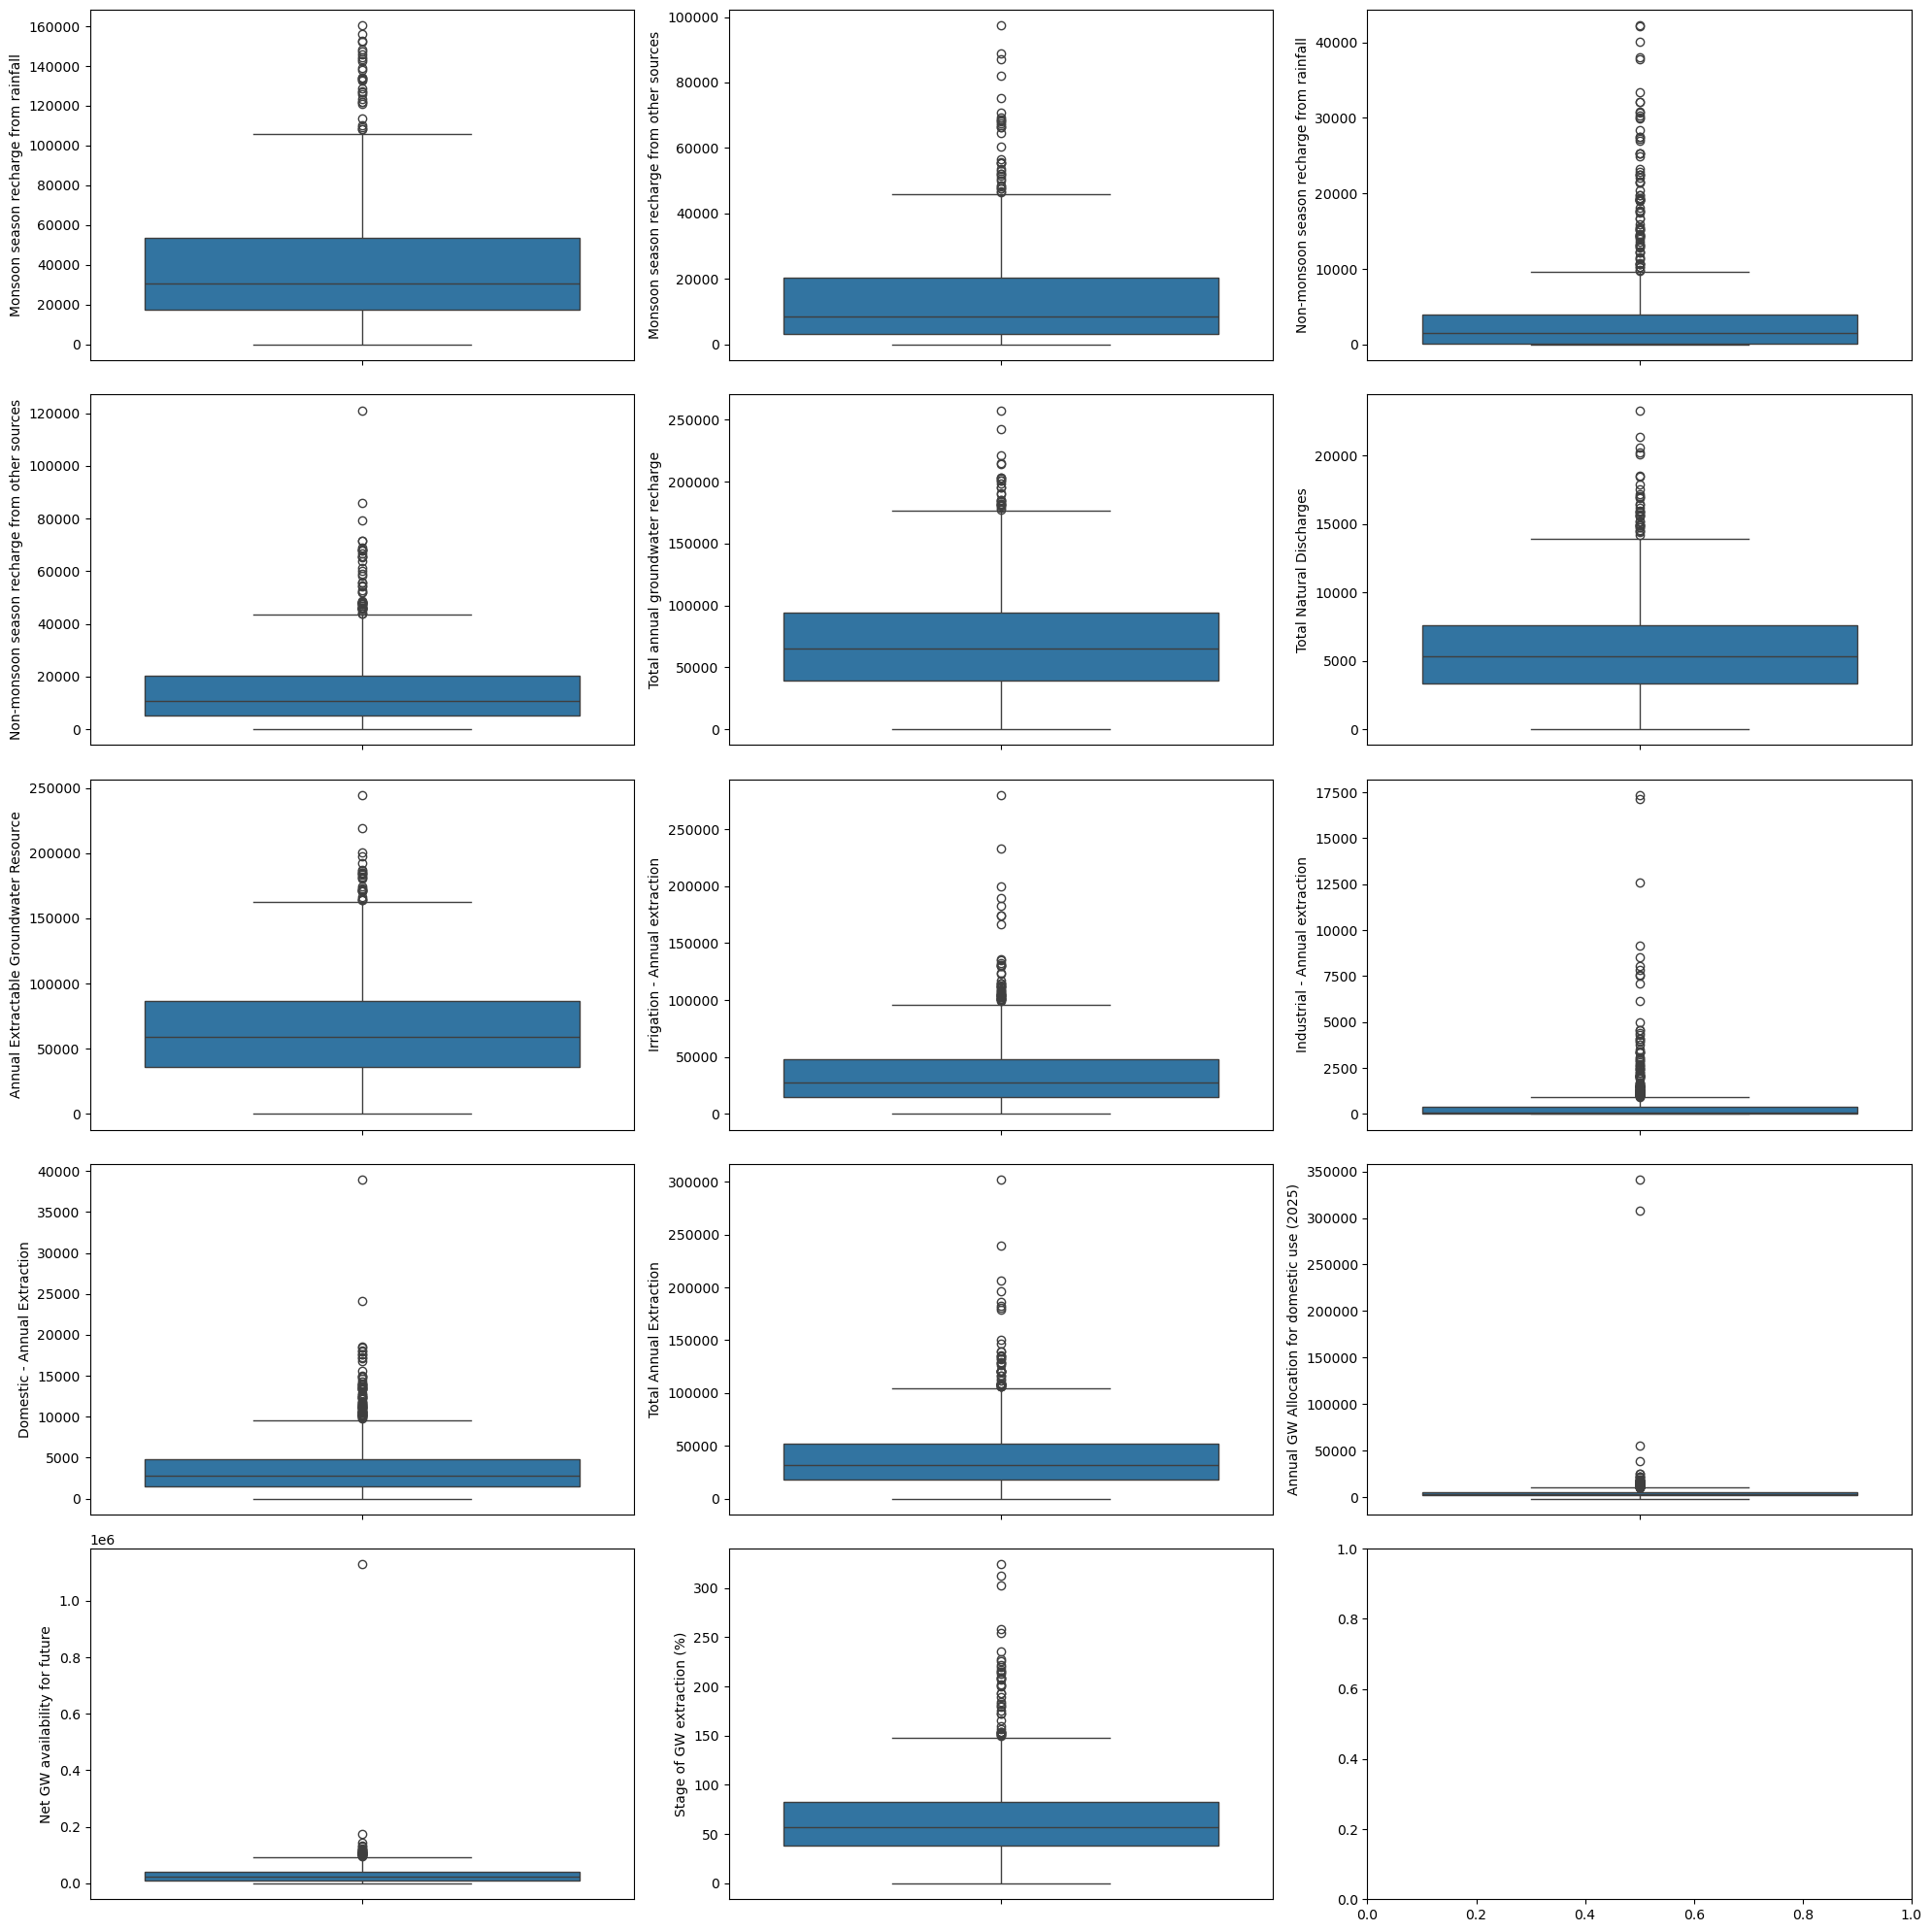

In [257]:
cols=['Monsoon season recharge from rainfall',
       'Monsoon season recharge from other sources',
       'Non-monsoon season recharge from rainfall',
       'Non-monsoon season recharge from other sources',
       'Total annual groundwater recharge', 'Total Natural Discharges',
       'Annual Extractable Groundwater Resource',
       'Irrigation - Annual extraction', 'Industrial - Annual extraction',
       'Domestic - Annual Extraction', 'Total Annual Extraction',
       'Annual GW Allocation for domestic use (2025)',
       'Net GW availability for future', 'Stage of GW extraction (%)']

fig, axes = plt.subplots(5,3, figsize=(20, 20)) 
axes = axes.flatten()  # Flatten the 2D array of axes for easier access

# Plotting each column
for i in range(len(cols)):
    sns.boxplot(data=raw_data, y=cols[i], ax=axes[i])

plt.tight_layout()
plt.show()

In [258]:
def univariate_num(data,x): 
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(), 2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5), 2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean, "var":var, "std":std, "range":range1, "q1":q1, "q2":q2, "q3":q3, "skewness":skew,
             "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

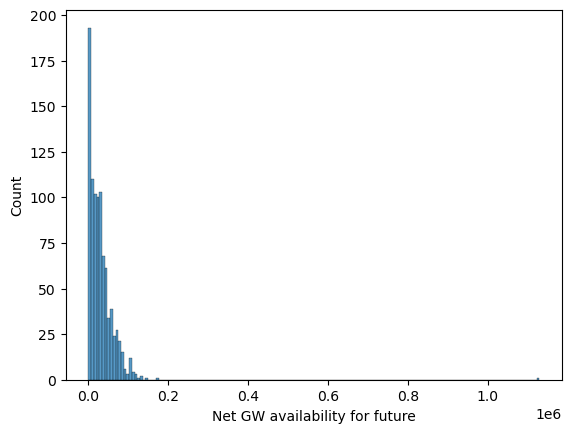

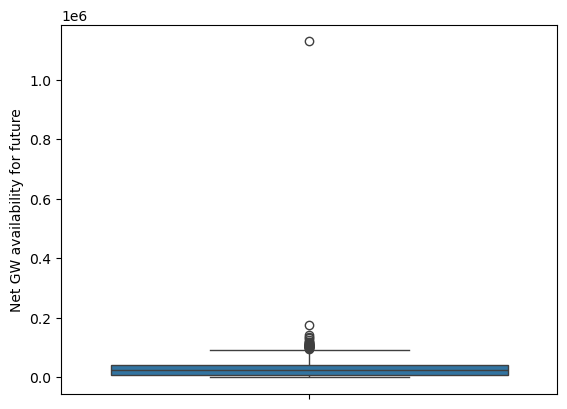

{'missing': 0,
 'min': 0.0,
 'max': 1128676.9,
 'mean': 31247.37,
 'var': 2018375596.24,
 'std': 44926.34,
 'range': 1128676.9,
 'q1': 9169.06,
 'q2': 24544.09,
 'q3': 42448.3,
 'skewness': 15.95,
 'kurtosis': 382.92}

In [259]:
univariate_num(raw_data, x='Net GW availability for future')

In [260]:
cols=['Monsoon season recharge from rainfall',
       'Monsoon season recharge from other sources',
       'Non-monsoon season recharge from rainfall',
       'Non-monsoon season recharge from other sources',
       'Total annual groundwater recharge', 'Total Natural Discharges',
       'Annual Extractable Groundwater Resource',
       'Irrigation - Annual extraction', 'Industrial - Annual extraction',
       'Domestic - Annual Extraction', 'Total Annual Extraction',
       'Annual GW Allocation for domestic use (2025)',
       'Net GW availability for future', 'Stage of GW extraction (%)']

def outlier_proportion(df,cols):
    outlier_info=[]

    for column in cols:
        q1=df[column].quantile(0.25)
        q3=df[column].quantile(0.75)
        iqr=q3-q1 
        ul= q3+1.5*iqr 
        ll=q1-1.5*iqr
        outlier=df[(df[column] <ll) | (df[column] >ul)]
        outlier_info.append({'Feature': column, 'No. of Outliers': outlier.shape[0]})

    outlier_df = pd.DataFrame(outlier_info)
    outlier_df['Outlier Proportion']=outlier_df['No. of Outliers']*100/df.shape[0]
    return outlier_df

In [261]:
outlier_proportion(raw_data,cols)

,Feature,No. of Outliers,Outlier Proportion
0,Monsoon season recharge from rainfall,30,3.222342
1,Monsoon season recharge from other sources,33,3.544576
2,Non-monsoon season recharge from rainfall,83,8.915145
3,Non-monsoon season recharge from other sources,48,5.155747
4,Total annual groundwater recharge,26,2.792696
5,Total Natural Discharges,36,3.866810
6,Annual Extractable Groundwater Resource,25,2.685285
7,Irrigation - Annual extraction,48,5.155747
8,Industrial - Annual extraction,118,12.674544
9,Domestic - Annual Extraction,73,7.841031


In [262]:
raw_data.to_excel('Groundwater_Capstone_outliers.xlsx', sheet_name='groundwater availability')

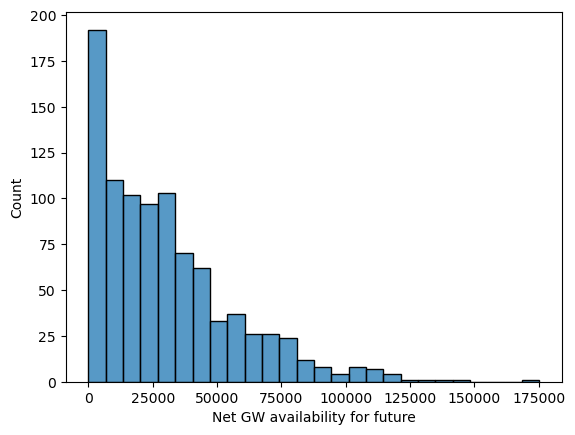

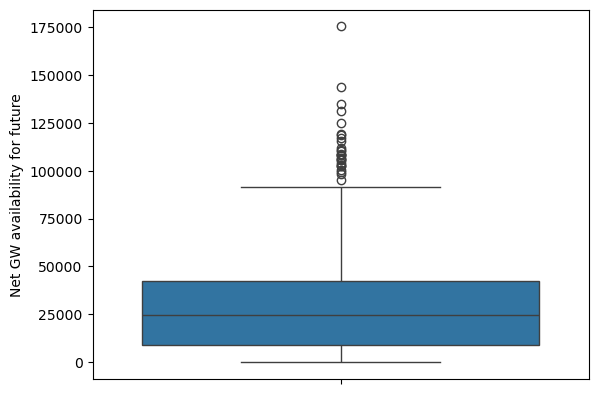

{'missing': 0,
 'min': 0.0,
 'max': 175236.1,
 'mean': 30067.33,
 'var': 722758581.13,
 'std': 26884.17,
 'range': 175236.1,
 'q1': 9135.96,
 'q2': 24521.94,
 'q3': 42394.57,
 'skewness': 1.28,
 'kurtosis': 1.93}

In [263]:
raw_data=raw_data[raw_data['Net GW availability for future']<300000]
raw_data.reset_index(drop=True, inplace=True)
univariate_num(raw_data, x='Net GW availability for future')

In [264]:
outlier_proportion(raw_data,cols)

,Feature,No. of Outliers,Outlier Proportion
0,Monsoon season recharge from rainfall,30,3.225806
1,Monsoon season recharge from other sources,33,3.548387
2,Non-monsoon season recharge from rainfall,82,8.817204
3,Non-monsoon season recharge from other sources,48,5.161290
4,Total annual groundwater recharge,27,2.903226
5,Total Natural Discharges,36,3.870968
6,Annual Extractable Groundwater Resource,25,2.688172
7,Irrigation - Annual extraction,48,5.161290
8,Industrial - Annual extraction,118,12.688172
9,Domestic - Annual Extraction,73,7.849462


#### Deciding to retain most of the outliers as the model could learn interesting patterns from it.

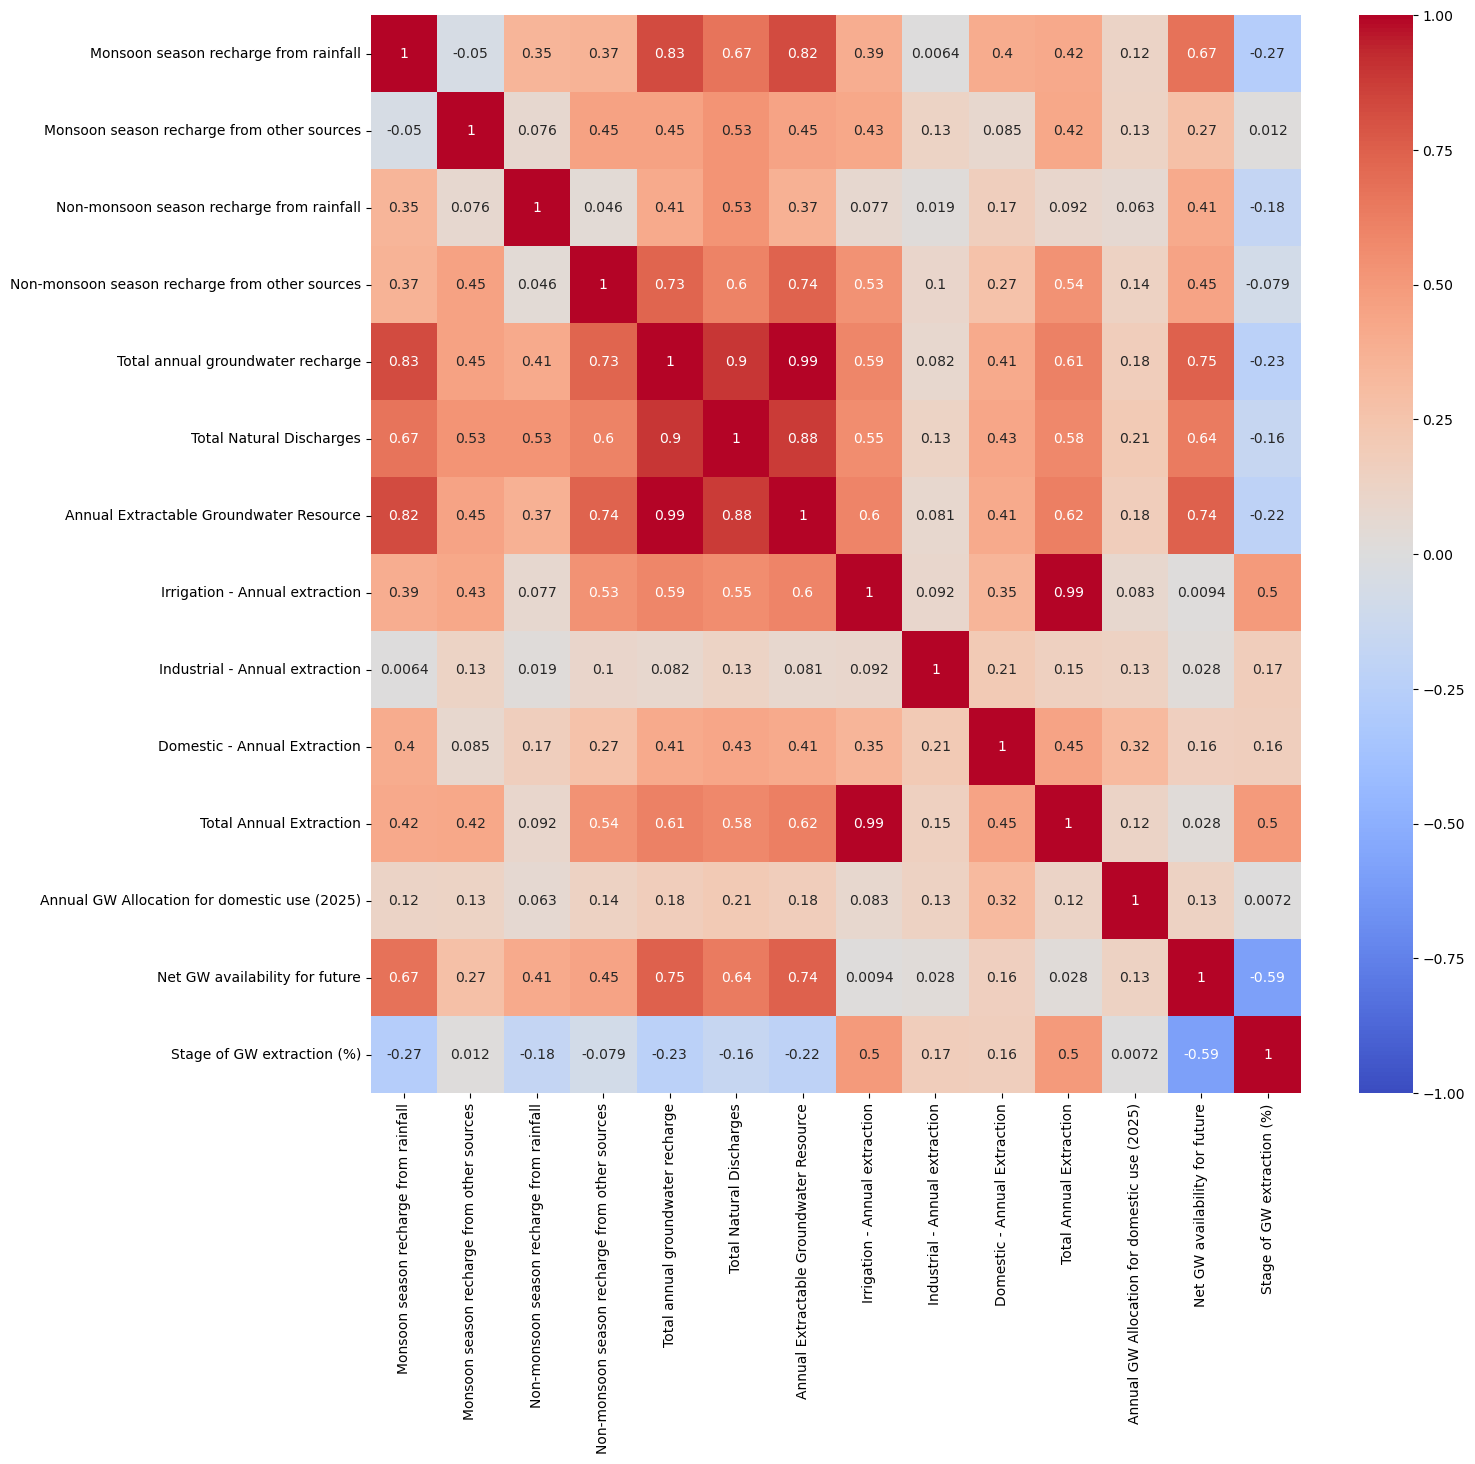

In [265]:
plt.figure(figsize=(15,14))
sns.heatmap(raw_data.corr(numeric_only=True), cmap='coolwarm', annot=True, vmax=1, vmin=-1)
plt.show()

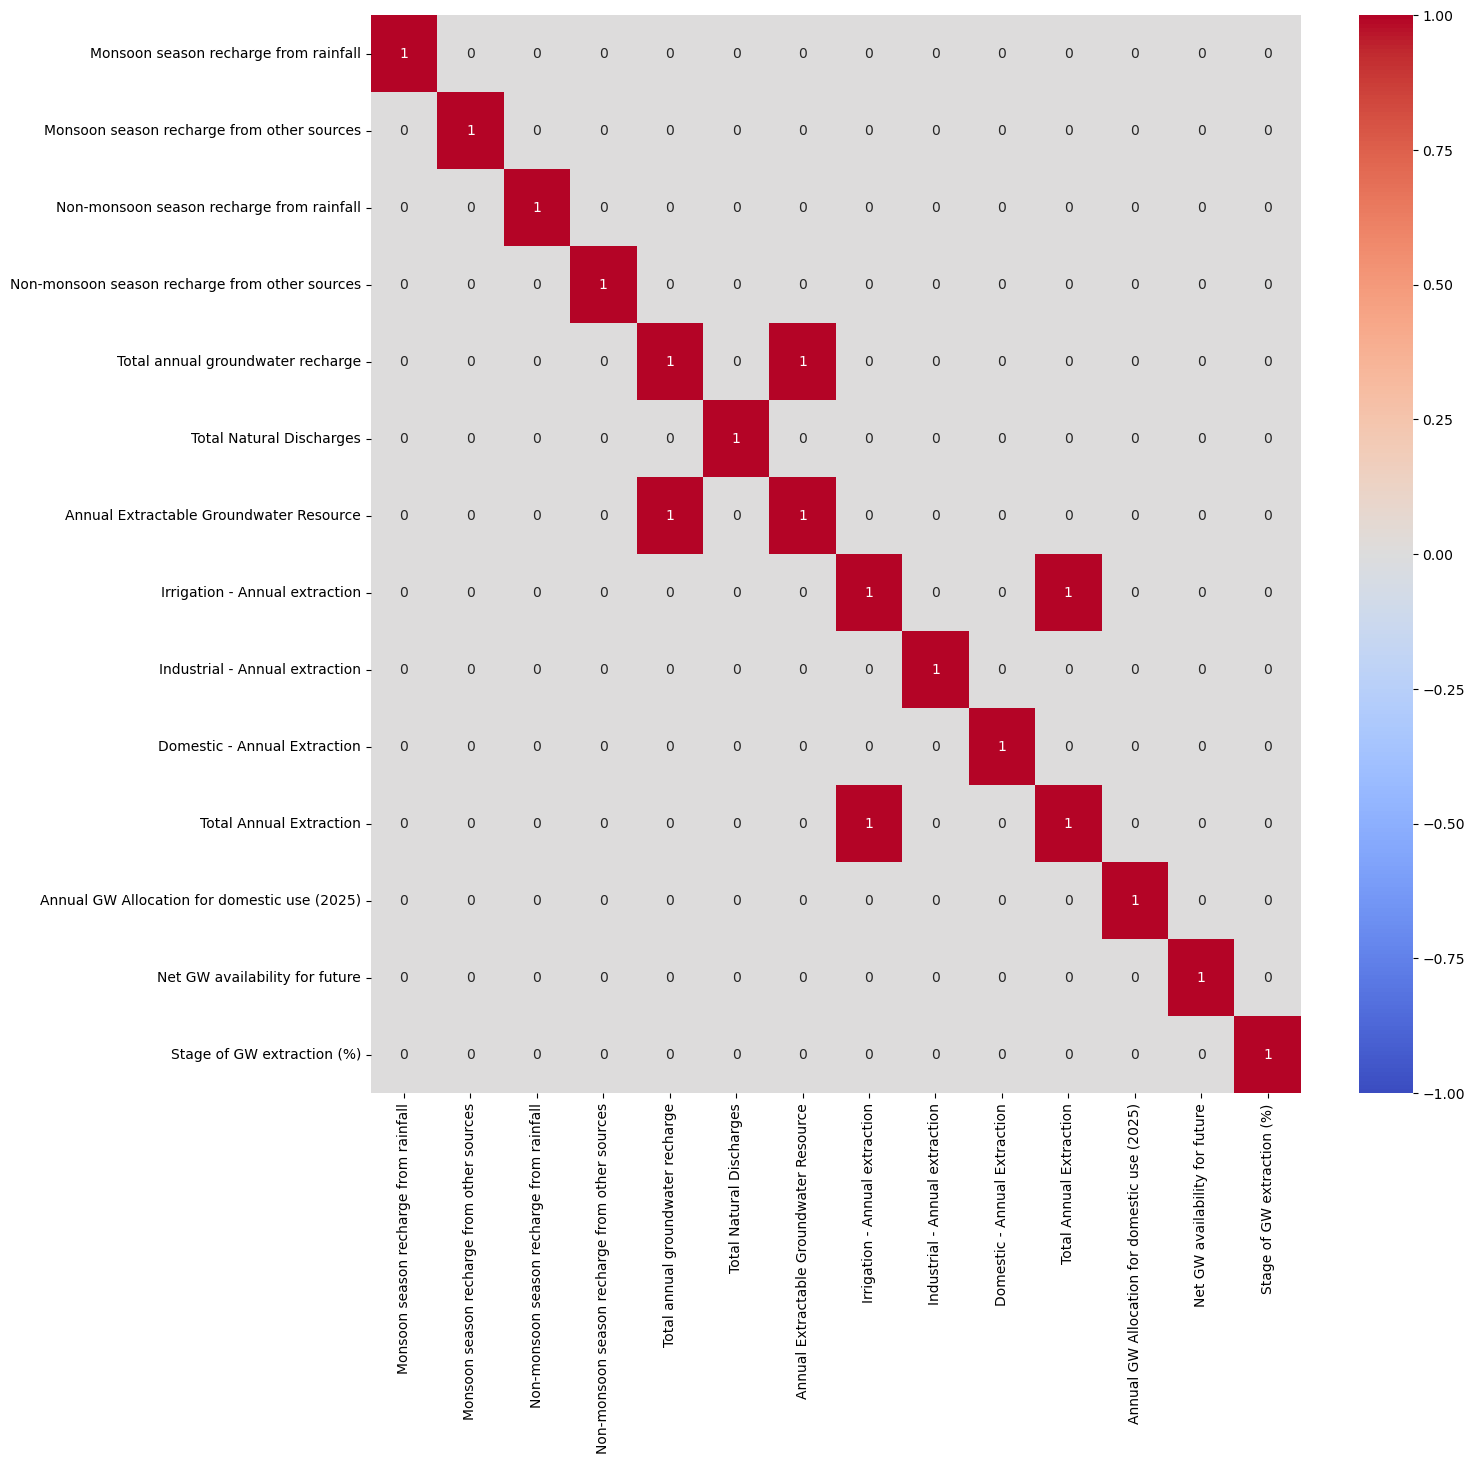

In [266]:
plt.figure(figsize=(15,14))
sns.heatmap(raw_data.corr(numeric_only=True)>0.90, cmap='coolwarm', annot=True, vmax=1, vmin=-1)
plt.show()

In [267]:
raw_data.columns

Index(['Name of District', 'Monsoon season recharge from rainfall',
       'Monsoon season recharge from other sources',
       'Non-monsoon season recharge from rainfall',
       'Non-monsoon season recharge from other sources',
       'Total annual groundwater recharge', 'Total Natural Discharges',
       'Annual Extractable Groundwater Resource',
       'Irrigation - Annual extraction', 'Industrial - Annual extraction',
       'Domestic - Annual Extraction', 'Total Annual Extraction',
       'Annual GW Allocation for domestic use (2025)',
       'Net GW availability for future', 'Stage of GW extraction (%)', 'State',
       'Year'],
      dtype='object')

In [268]:
#dropping these columns as they don't seem to have a significant impact on the target variable or show multicolinearity
raw_data.drop([ 'Total annual groundwater recharge','Irrigation - Annual extraction','Stage of GW extraction (%)'],axis=1, inplace=True)

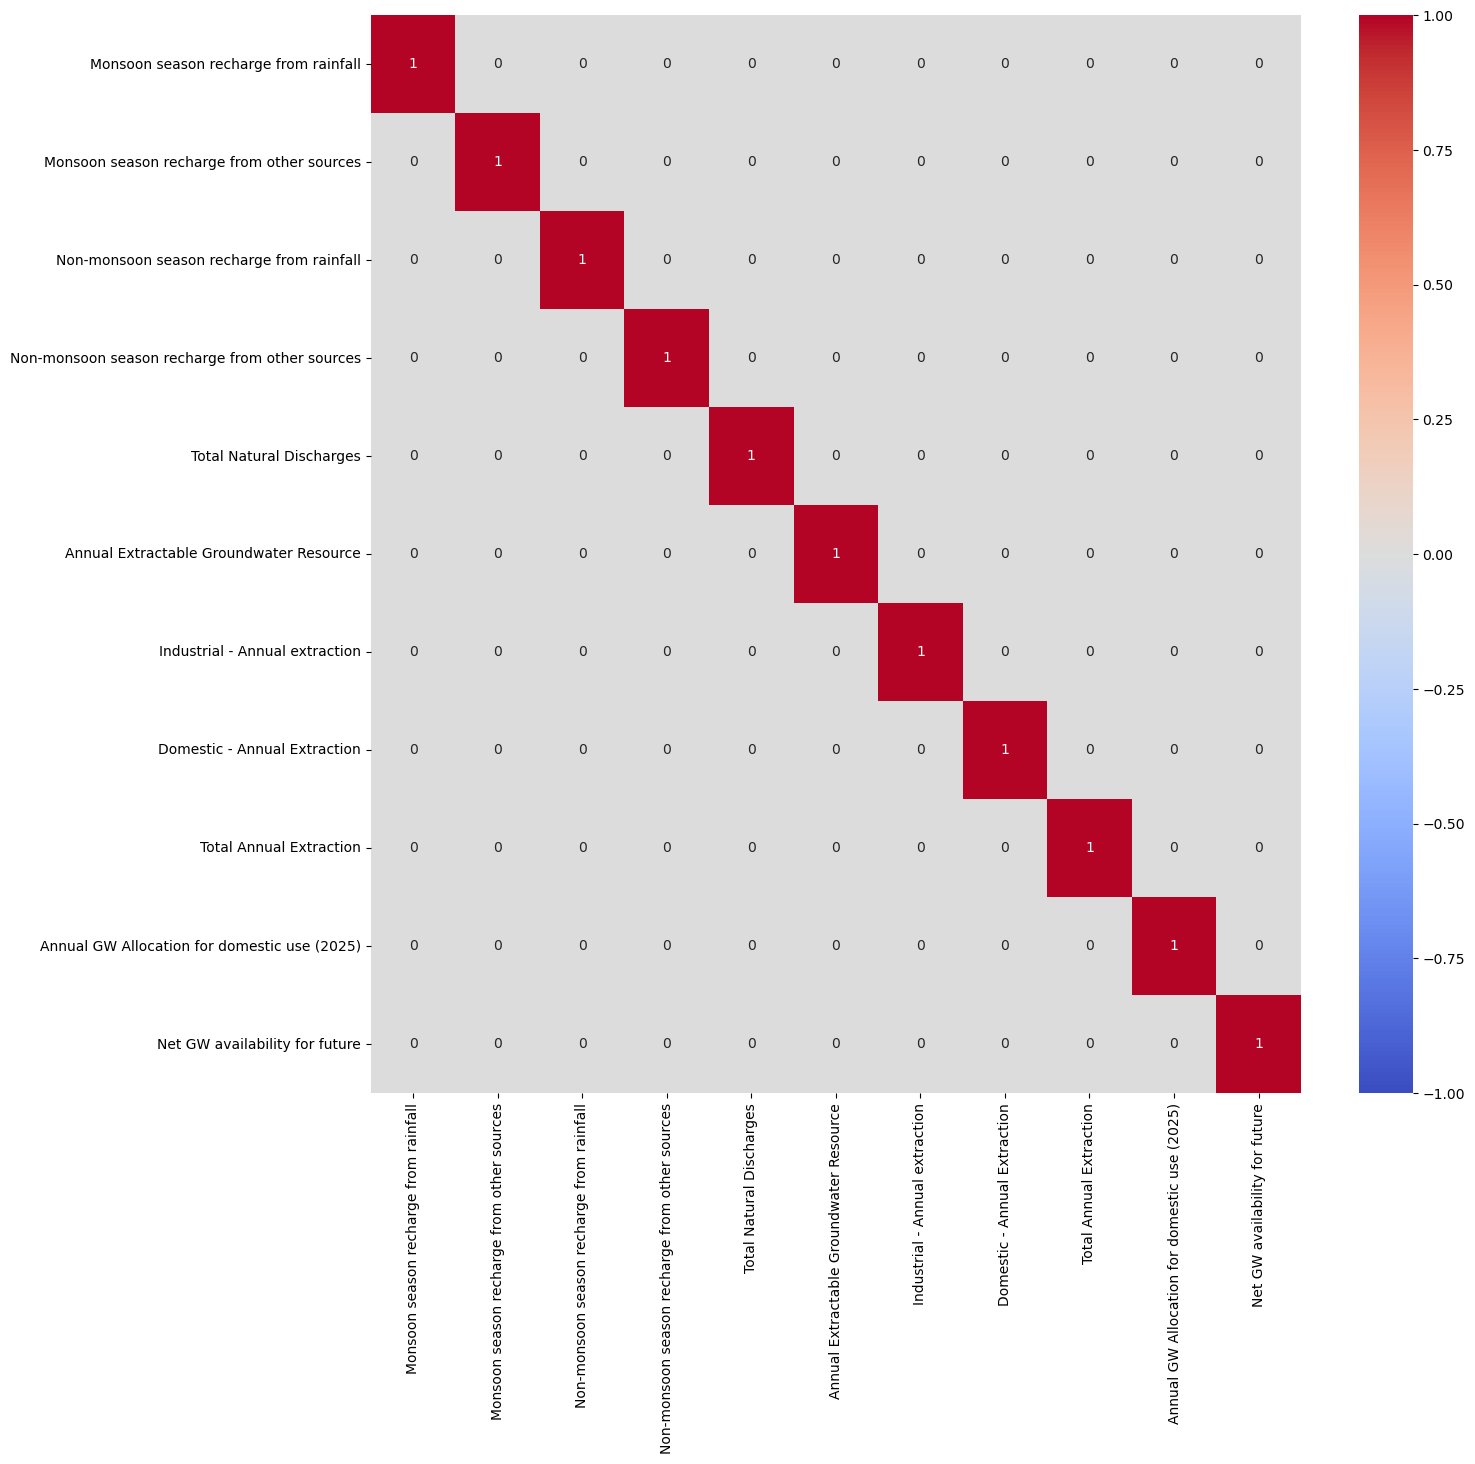

In [269]:
plt.figure(figsize=(15,14))
sns.heatmap(raw_data.corr(numeric_only=True)>0.90, cmap='coolwarm', annot=True, vmax=1, vmin=-1)
plt.show()

#### Data Transformation

In [270]:
#dummy encoding
raw_data['Year'] = raw_data['Year'].astype('category')
type_dummies = pd.get_dummies(raw_data[['State','Year']], drop_first=True)
print(raw_data.shape, type_dummies.shape)
df_with_dummies = pd.concat([raw_data, type_dummies], axis=1)
df_with_dummies.drop(['State','Year'],axis=1,inplace=True)
df_with_dummies.head()

(930, 14) (930, 19)


,Name of District,Monsoon season recharge from rainfall,Monsoon season recharge from other sources,Non-monsoon season recharge from rainfall,Non-monsoon season recharge from other sources,Total Natural Discharges,Annual Extractable Groundwater Resource,Industrial - Annual extraction,Domestic - Annual Extraction,Total Annual Extraction,Annual GW Allocation for domestic use (2025),Net GW availability for future,State_Assam,State_Bihar,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Odisha,State_Punjab,State_Rajasthan,State_Tamil Nadu,State_Telangana,State_Uttar Pradesh,State_West Bengal,Year_2022-01-01 00:00:00,Year_2023-01-01 00:00:00
0,Central,248.00,704.60,105.61,1393.29,245.15,2206.35,0.00,1496.18,1740.96,2087.35,487.11,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,East,84.21,508.93,41.13,1001.76,163.62,1472.41,0.20,1282.15,1392.91,1439.42,79.50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Nazul Land,224.11,65.89,109.46,110.43,50.99,458.90,0.00,86.04,314.04,86.04,144.86,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,New Delhi,660.52,653.90,353.23,1245.39,291.30,2621.74,2.20,2923.44,3612.52,2923.45,0.00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,North,1629.66,819.07,636.08,1590.90,467.57,4208.14,50.31,4052.92,4592.99,4084.62,208.08,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [271]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Name of District                                930 non-null    object 
 1   Monsoon season recharge from rainfall           930 non-null    float64
 2   Monsoon season recharge from other sources      930 non-null    float64
 3   Non-monsoon season recharge from rainfall       930 non-null    float64
 4   Non-monsoon season recharge from other sources  930 non-null    float64
 5   Total Natural Discharges                        930 non-null    float64
 6   Annual Extractable Groundwater Resource         930 non-null    float64
 7   Industrial - Annual extraction                  930 non-null    float64
 8   Domestic - Annual Extraction                    930 non-null    float64
 9   Total Annual Extraction                    

In [272]:
df_with_dummies.columns

Index(['Name of District', 'Monsoon season recharge from rainfall',
       'Monsoon season recharge from other sources',
       'Non-monsoon season recharge from rainfall',
       'Non-monsoon season recharge from other sources',
       'Total Natural Discharges', 'Annual Extractable Groundwater Resource',
       'Industrial - Annual extraction', 'Domestic - Annual Extraction',
       'Total Annual Extraction',
       'Annual GW Allocation for domestic use (2025)',
       'Net GW availability for future', 'State_Assam', 'State_Bihar',
       'State_Delhi', 'State_Goa', 'State_Gujarat', 'State_Haryana',
       'State_Karnataka', 'State_Kerala', 'State_Madhya Pradesh',
       'State_Maharashtra', 'State_Odisha', 'State_Punjab', 'State_Rajasthan',
       'State_Tamil Nadu', 'State_Telangana', 'State_Uttar Pradesh',
       'State_West Bengal', 'Year_2022-01-01 00:00:00',
       'Year_2023-01-01 00:00:00'],
      dtype='object')

#### Feature Scaling

In [273]:
#Feature Scaling
print(df_with_dummies.shape)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
columns=[ 'Monsoon season recharge from rainfall',
       'Monsoon season recharge from other sources',
       'Non-monsoon season recharge from rainfall',
       'Non-monsoon season recharge from other sources',
       'Total Natural Discharges', 'Annual Extractable Groundwater Resource',
       'Industrial - Annual extraction', 'Domestic - Annual Extraction',
       'Total Annual Extraction',
       'Annual GW Allocation for domestic use (2025)',
       'Net GW availability for future',]
normalized_feat=pd.DataFrame(scaler.fit_transform(df_with_dummies[columns]), columns=columns)
df_cat=df_with_dummies[['State_Assam', 'State_Bihar',
       'State_Delhi', 'State_Goa', 'State_Gujarat', 'State_Haryana',
       'State_Karnataka', 'State_Kerala', 'State_Madhya Pradesh',
       'State_Maharashtra', 'State_Odisha', 'State_Punjab', 'State_Rajasthan',
       'State_Tamil Nadu', 'State_Telangana', 'State_Uttar Pradesh', 'State_West Bengal', 'Year_2022-01-01 00:00:00',
       'Year_2023-01-01 00:00:00']]
print(normalized_feat.shape, df_cat.shape)
df_with_dummies=pd.concat([normalized_feat, df_cat], axis=1)
#df_with_dummies.drop('index', axis=1, inplace=True)
print(df_with_dummies.shape)
df_with_dummies.head()

(930, 31)
(930, 11) (930, 19)
(930, 30)


,Monsoon season recharge from rainfall,Monsoon season recharge from other sources,Non-monsoon season recharge from rainfall,Non-monsoon season recharge from other sources,Total Natural Discharges,Annual Extractable Groundwater Resource,Industrial - Annual extraction,Domestic - Annual Extraction,Total Annual Extraction,Annual GW Allocation for domestic use (2025),Net GW availability for future,State_Assam,State_Bihar,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Odisha,State_Punjab,State_Rajasthan,State_Tamil Nadu,State_Telangana,State_Uttar Pradesh,State_West Bengal,Year_2022-01-01 00:00:00,Year_2023-01-01 00:00:00
0,0.001547,0.007237,0.002501,0.011504,0.010525,0.009019,0.000000,0.038436,0.005765,0.010325,0.002780,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,0.000525,0.005227,0.000974,0.008271,0.007025,0.006019,0.000012,0.032937,0.004612,0.008433,0.000454,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0.001398,0.000677,0.002593,0.000912,0.002189,0.001876,0.000000,0.002210,0.001040,0.004481,0.000827,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,0.004120,0.006716,0.008366,0.010283,0.012507,0.010717,0.000127,0.075101,0.011961,0.012766,0.000000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.010166,0.008413,0.015066,0.013135,0.020075,0.017201,0.002899,0.104116,0.015208,0.016157,0.001187,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [274]:
y=df_with_dummies['Net GW availability for future']
x=df_with_dummies.drop(columns=['Net GW availability for future'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=100)
x_train.shape, x_test.shape

((744, 29), (186, 29))

#### Feature Selection

In [275]:
#feature selection
from sklearn.ensemble import RandomForestRegressor
def random_forest_feature_importance(x_train, y_train):
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(x_train, y_train)
    
    importances = rf_model.feature_importances_
    feature_names = x_train.columns
    
    
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # percentage importance
    feature_importance_df['Importance Percentage'] = feature_importance_df['Importance'] * 100
    
    # visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance Percentage', y='Feature', data=feature_importance_df)
    plt.title('Random Forest Feature Importance')
    plt.xlabel('Importance (%)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    
    return feature_importance_df

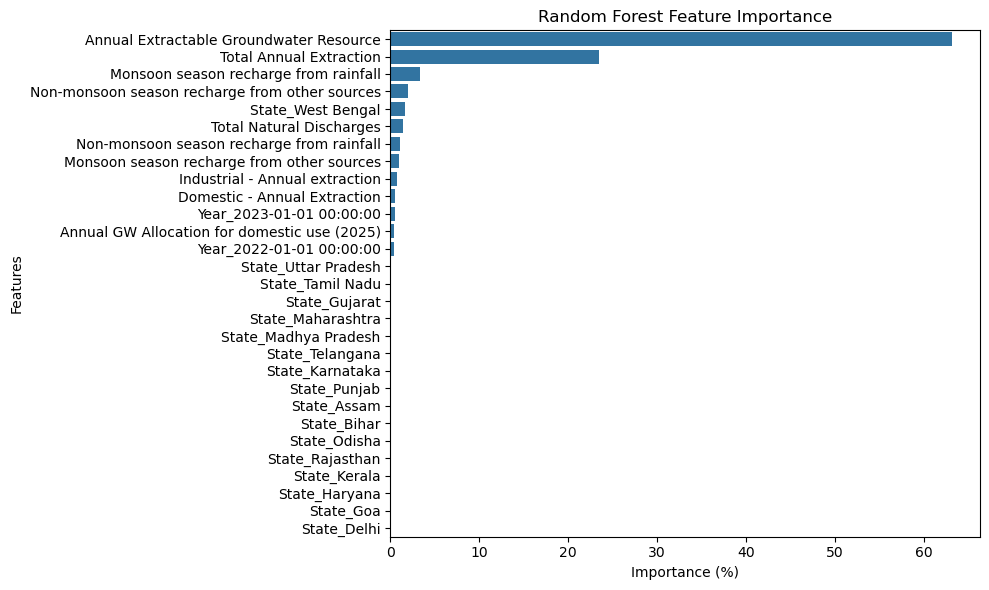

,Feature,Importance,Importance Percentage
5,Annual Extractable Groundwater Resource,6.319167e-01,63.191675
8,Total Annual Extraction,2.342908e-01,23.429077
0,Monsoon season recharge from rainfall,3.318981e-02,3.318981
3,Non-monsoon season recharge from other sources,1.975368e-02,1.975368
26,State_West Bengal,1.691821e-02,1.691821
4,Total Natural Discharges,1.468417e-02,1.468417
2,Non-monsoon season recharge from rainfall,1.073084e-02,1.073084
1,Monsoon season recharge from other sources,1.014936e-02,1.014936
6,Industrial - Annual extraction,7.439136e-03,0.743914
7,Domestic - Annual Extraction,5.690353e-03,0.569035


In [276]:
random_forest_feature_importance(x_train, y_train)

In [277]:
x_train.columns

Index(['Monsoon season recharge from rainfall',
       'Monsoon season recharge from other sources',
       'Non-monsoon season recharge from rainfall',
       'Non-monsoon season recharge from other sources',
       'Total Natural Discharges', 'Annual Extractable Groundwater Resource',
       'Industrial - Annual extraction', 'Domestic - Annual Extraction',
       'Total Annual Extraction',
       'Annual GW Allocation for domestic use (2025)', 'State_Assam',
       'State_Bihar', 'State_Delhi', 'State_Goa', 'State_Gujarat',
       'State_Haryana', 'State_Karnataka', 'State_Kerala',
       'State_Madhya Pradesh', 'State_Maharashtra', 'State_Odisha',
       'State_Punjab', 'State_Rajasthan', 'State_Tamil Nadu',
       'State_Telangana', 'State_Uttar Pradesh', 'State_West Bengal',
       'Year_2022-01-01 00:00:00', 'Year_2023-01-01 00:00:00'],
      dtype='object')

In [278]:
#selecting features with feature imporatance > 1%
columns=['Monsoon season recharge from rainfall',
      'State_West Bengal',  'Annual Extractable Groundwater Resource',
       'Non-monsoon season recharge from other sources',  'Total Annual Extraction', 'Total Natural Discharges',
        'Monsoon season recharge from other sources',
       'Non-monsoon season recharge from rainfall',]
      
x_train=x_train[columns]
x_train.head()

,Monsoon season recharge from rainfall,State_West Bengal,Annual Extractable Groundwater Resource,Non-monsoon season recharge from other sources,Total Annual Extraction,Total Natural Discharges,Monsoon season recharge from other sources,Non-monsoon season recharge from rainfall
832,0.303868,False,0.236631,0.066783,0.091510,0.130937,0.042495,0.000000
353,0.129496,False,0.189877,0.138537,0.076030,0.216881,0.119305,0.055618
746,0.126240,False,0.233556,0.186192,0.289385,0.251139,0.194298,0.030330
174,0.115047,False,0.294749,0.067732,0.176541,0.343990,0.529507,0.045442
447,0.164628,False,0.135690,0.035172,0.018060,0.142966,0.043680,0.038396


In [279]:
x_test=x_test[columns]
x_test.head()

,Monsoon season recharge from rainfall,State_West Bengal,Annual Extractable Groundwater Resource,Non-monsoon season recharge from other sources,Total Annual Extraction,Total Natural Discharges,Monsoon season recharge from other sources,Non-monsoon season recharge from rainfall
372,0.365106,False,0.253090,0.049481,0.428947,0.295371,0.011323,0.075079
117,0.090312,False,0.148646,0.082083,0.067979,0.139637,0.129926,0.060341
299,0.390840,False,0.632850,0.506979,0.317122,0.639848,0.459088,0.022883
133,0.166846,False,0.249402,0.153652,0.064313,0.268562,0.203210,0.050373
766,0.169022,False,0.177067,0.074650,0.098877,0.206648,0.051030,0.166392


#### Model Building

In [280]:
#function to tabulate performance metrics of each model
score_card= pd.DataFrame(columns=['Model','R2 Score', 'Adjusted R2 Score', 'Mean Square Error (MSE)',
                                  'Root Mean Square Error (RMSE)','Mean Absolute Error (MAE)'])

def update_score_card (model_name):
    global score_card
    score_card= score_card._append({'Model': model_name,
                                   'R2 Score': r2_score(y_test,y_pred),
                                   'Adjusted R2 Score': adj_r2,
                                   'Mean Square Error (MSE)': mean_squared_error(y_test,y_pred),
                                   'Root Mean Square Error (RMSE)': np.sqrt(mean_squared_error(y_test,y_pred)),
                                   'Mean Absolute Error (MAE)': mean_absolute_error(y_test,y_pred)}, ignore_index=True)
    return (score_card)

### Linear Regression

In [281]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [282]:
y_train_pred=lr.predict(x_train)
y_pred=lr.predict(x_test)

r2= r2_score(y_test,y_pred)
n = x_train.shape[0] 
p = x_train.shape[1] 
adj_r2= 1 - (1-r2)*(n-1)/(n-p-1)

update_score_card(model_name='Linear Regression')

,Model,R2 Score,Adjusted R2 Score,Mean Square Error (MSE),Root Mean Square Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,0.910635,0.909663,0.002298,0.047938,0.032296


### Decision Tree

In [283]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

model= DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
r2= r2_score(y_test,y_pred)
n = x_train.shape[0] 
p = x_train.shape[1] 
adj_r2= 1 - (1-r2)*(n-1)/(n-p-1)
update_score_card(model_name='Decision Tree')

,Model,R2 Score,Adjusted R2 Score,Mean Square Error (MSE),Root Mean Square Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,0.910635,0.909663,0.002298,0.047938,0.032296
1,Decision Tree,0.844910,0.843222,0.003988,0.063152,0.027448


In [284]:
tuned_param = [{'criterion': ['squared_error', 'absolute_error'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]
from sklearn.model_selection import GridSearchCV
decision_tree_regression = DecisionTreeRegressor(random_state=25)
grid = GridSearchCV(estimator = decision_tree_regression, param_grid = tuned_param, cv = 10)
dtgrid=grid.fit(x_train,y_train)
print('Best parameters for decision tree regressor: ', dtgrid.best_params_,)

Best parameters for decision tree regressor:  {'criterion': 'absolute_error', 'max_depth': 7, 'max_leaf_nodes': 25, 'min_samples_leaf': 15, 'min_samples_split': 10}


In [285]:

model= DecisionTreeRegressor(random_state=42, max_depth=9, max_leaf_nodes=25, min_samples_leaf=15, min_samples_split=10, criterion='absolute_error')
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
r2= r2_score(y_test,y_pred)
n = x_train.shape[0] 
p = x_train.shape[1] 
adj_r2= 1 - (1-r2)*(n-1)/(n-p-1)
update_score_card(model_name='Decision Tree (pruned)')

,Model,R2 Score,Adjusted R2 Score,Mean Square Error (MSE),Root Mean Square Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,0.910635,0.909663,0.002298,0.047938,0.032296
1,Decision Tree,0.844910,0.843222,0.003988,0.063152,0.027448
2,Decision Tree (pruned),0.825048,0.823143,0.004499,0.067075,0.044155


### Random Forest

In [286]:
#from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=100, random_state=43, max_depth=5)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

r2= r2_score(y_test,y_pred)
n = x_train.shape[0] 
p = x_train.shape[1] 
adj_r2= 1 - (1-r2)*(n-1)/(n-p-1)
update_score_card(model_name='Random Forest')

,Model,R2 Score,Adjusted R2 Score,Mean Square Error (MSE),Root Mean Square Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,0.910635,0.909663,0.002298,0.047938,0.032296
1,Decision Tree,0.844910,0.843222,0.003988,0.063152,0.027448
2,Decision Tree (pruned),0.825048,0.823143,0.004499,0.067075,0.044155
3,Random Forest,0.920060,0.919190,0.002056,0.045340,0.030117


#### The below code blocks have been changed to raw format to save time on re-running the code.

### AdaBoost

In [287]:
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
ada_model = AdaBoostRegressor(n_estimators=100, random_state=40, learning_rate=0.0001)
ada_model.fit(x_train, y_train)

y_pred = ada_model.predict(x_test)

r2= r2_score(y_test,y_pred)
n = x_train.shape[0] 
p = x_train.shape[1] 
adj_r2= 1 - (1-r2)*(n-1)/(n-p-1)
update_score_card(model_name='AdaBoost')

,Model,R2 Score,Adjusted R2 Score,Mean Square Error (MSE),Root Mean Square Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,0.910635,0.909663,0.002298,0.047938,0.032296
1,Decision Tree,0.844910,0.843222,0.003988,0.063152,0.027448
2,Decision Tree (pruned),0.825048,0.823143,0.004499,0.067075,0.044155
3,Random Forest,0.920060,0.919190,0.002056,0.045340,0.030117
4,AdaBoost,0.761264,0.758666,0.006139,0.078353,0.059010


In [288]:
ada_model = AdaBoostRegressor(n_estimators=50, random_state=40, loss= 'exponential', learning_rate=0.1)
ada_model.fit(x_train, y_train)

y_pred = ada_model.predict(x_test)

r2= r2_score(y_test,y_pred)
n = x_train.shape[0] 
p = x_train.shape[1] 
adj_r2= 1 - (1-r2)*(n-1)/(n-p-1)
update_score_card(model_name='AdaBoost2')

,Model,R2 Score,Adjusted R2 Score,Mean Square Error (MSE),Root Mean Square Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,0.910635,0.909663,0.002298,0.047938,0.032296
1,Decision Tree,0.844910,0.843222,0.003988,0.063152,0.027448
2,Decision Tree (pruned),0.825048,0.823143,0.004499,0.067075,0.044155
3,Random Forest,0.920060,0.919190,0.002056,0.045340,0.030117
4,AdaBoost,0.761264,0.758666,0.006139,0.078353,0.059010
5,AdaBoost2,0.821199,0.819253,0.004598,0.067808,0.051272


In [289]:
ada_model = AdaBoostRegressor(n_estimators=300, random_state=40, loss= 'square', learning_rate=1.0)
ada_model.fit(x_train, y_train)

y_pred = ada_model.predict(x_test)

r2= r2_score(y_test,y_pred)
n = x_train.shape[0] 
p = x_train.shape[1] 
adj_r2= 1 - (1-r2)*(n-1)/(n-p-1)
update_score_card(model_name='AdaBoost3')

,Model,R2 Score,Adjusted R2 Score,Mean Square Error (MSE),Root Mean Square Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,0.910635,0.909663,0.002298,0.047938,0.032296
1,Decision Tree,0.844910,0.843222,0.003988,0.063152,0.027448
2,Decision Tree (pruned),0.825048,0.823143,0.004499,0.067075,0.044155
3,Random Forest,0.920060,0.919190,0.002056,0.045340,0.030117
4,AdaBoost,0.761264,0.758666,0.006139,0.078353,0.059010
5,AdaBoost2,0.821199,0.819253,0.004598,0.067808,0.051272
6,AdaBoost3,0.734564,0.731675,0.006826,0.082619,0.065952


### XGBoost

In [290]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.0001, random_state=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2= r2_score(y_test,y_pred)
n = x_train.shape[0] 
p = x_train.shape[1] 
adj_r2= 1 - (1-r2)*(n-1)/(n-p-1)
update_score_card(model_name='XGBoost')

,Model,R2 Score,Adjusted R2 Score,Mean Square Error (MSE),Root Mean Square Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,0.910635,0.909663,0.002298,0.047938,0.032296
1,Decision Tree,0.844910,0.843222,0.003988,0.063152,0.027448
2,Decision Tree (pruned),0.825048,0.823143,0.004499,0.067075,0.044155
3,Random Forest,0.920060,0.919190,0.002056,0.045340,0.030117
4,AdaBoost,0.761264,0.758666,0.006139,0.078353,0.059010
5,AdaBoost2,0.821199,0.819253,0.004598,0.067808,0.051272
6,AdaBoost3,0.734564,0.731675,0.006826,0.082619,0.065952
7,XGBoost,-0.008870,-0.019851,0.025944,0.161070,0.121522


In [291]:
model = XGBRegressor(objective='reg:squaredlogerror', n_estimators=300, max_depth=3, learning_rate=0.05, random_state=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2= r2_score(y_test,y_pred)
n = x_train.shape[0] 
p = x_train.shape[1] 
adj_r2= 1 - (1-r2)*(n-1)/(n-p-1)
update_score_card(model_name='XGBoost2')

,Model,R2 Score,Adjusted R2 Score,Mean Square Error (MSE),Root Mean Square Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,0.910635,0.909663,0.002298,0.047938,0.032296
1,Decision Tree,0.844910,0.843222,0.003988,0.063152,0.027448
2,Decision Tree (pruned),0.825048,0.823143,0.004499,0.067075,0.044155
3,Random Forest,0.920060,0.919190,0.002056,0.045340,0.030117
4,AdaBoost,0.761264,0.758666,0.006139,0.078353,0.059010
5,AdaBoost2,0.821199,0.819253,0.004598,0.067808,0.051272
6,AdaBoost3,0.734564,0.731675,0.006826,0.082619,0.065952
7,XGBoost,-0.008870,-0.019851,0.025944,0.161070,0.121522
8,XGBoost2,0.919947,0.919076,0.002059,0.045372,0.024335


In [292]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:pseudohubererror', n_estimators=300, max_depth=3, learning_rate=0.2, random_state=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2= r2_score(y_test,y_pred)
n = x_train.shape[0] 
p = x_train.shape[1] 
adj_r2= 1 - (1-r2)*(n-1)/(n-p-1)
update_score_card(model_name='XGBoost3')

,Model,R2 Score,Adjusted R2 Score,Mean Square Error (MSE),Root Mean Square Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,0.910635,0.909663,0.002298,0.047938,0.032296
1,Decision Tree,0.844910,0.843222,0.003988,0.063152,0.027448
2,Decision Tree (pruned),0.825048,0.823143,0.004499,0.067075,0.044155
3,Random Forest,0.920060,0.919190,0.002056,0.045340,0.030117
4,AdaBoost,0.761264,0.758666,0.006139,0.078353,0.059010
5,AdaBoost2,0.821199,0.819253,0.004598,0.067808,0.051272
6,AdaBoost3,0.734564,0.731675,0.006826,0.082619,0.065952
7,XGBoost,-0.008870,-0.019851,0.025944,0.161070,0.121522
8,XGBoost2,0.919947,0.919076,0.002059,0.045372,0.024335
9,XGBoost3,0.923769,0.922940,0.001960,0.044275,0.024159


### ANN

In [293]:
from tensorflow.keras.layers import Dropout
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense
model1=Sequential() #initialization of architecture
#input layer and first hidden layer
model1.add(Dense(units=100, #no. greater than no. of features
                 kernel_initializer='uniform',
                 activation='relu',
                 input_shape=[x_train.shape[1]]))

#adding 2nd, 3rd, 4th, and 5th hidden layers
model1.add(Dense(units=60, kernel_initializer='uniform', activation='relu'))

model1.add(Dense(units=80, kernel_initializer='uniform', activation='relu'))

model1.add(Dense(units=90, kernel_initializer='uniform', activation='relu'))

model1.add(Dense(units=100, kernel_initializer='uniform', activation='relu'))


#output layer
model1.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

In [294]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 100)                 │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 60)                  │           6,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 80)                  │           4,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 90)                  │           7,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │           9,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,331 (110.67 KB)

 Trainable params: 28,331 (110.67 KB)

 Non-trainable params: 0 (0.00 B)

In [295]:
model1.compile(optimizer= 'adam', loss='mean_squared_error')
history=model1.fit(x_train,y_train, batch_size=62, epochs=100, validation_split=0.1, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0486 - val_loss: 0.0238
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0370 - val_loss: 0.0122
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0219 - val_loss: 0.0106
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0179 - val_loss: 0.0107
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0156 - val_loss: 0.0085
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - val_loss: 0.0058
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - val_loss: 0.0045
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - val_loss: 0.0036
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0069 - val_loss: 0.0027
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

<Axes: >

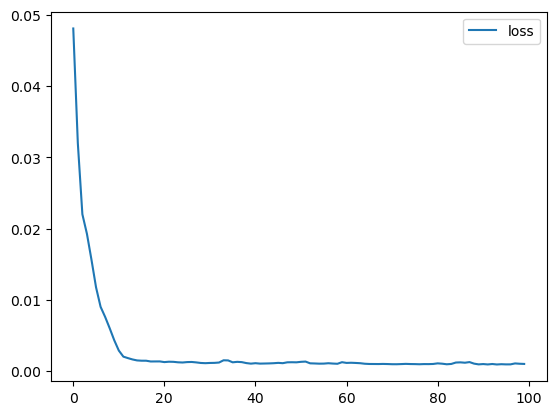

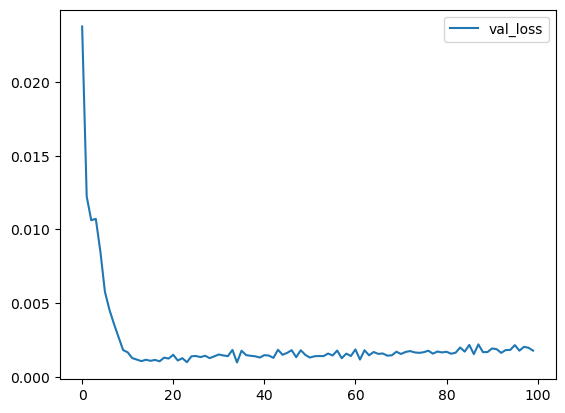

In [296]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss']].plot()
history_df.loc[:,['val_loss']].plot()

In [297]:
y_pred=model1.predict(x_test)

r2= r2_score(y_test,y_pred)
n = x_train.shape[0] 
p = x_train.shape[1] 
adj_r2= 1 - (1-r2)*(n-1)/(n-p-1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [298]:
update_score_card(model_name='Linear Regression with ANN')

,Model,R2 Score,Adjusted R2 Score,Mean Square Error (MSE),Root Mean Square Error (RMSE),Mean Absolute Error (MAE)
0,Linear Regression,0.910635,0.909663,0.002298,0.047938,0.032296
1,Decision Tree,0.844910,0.843222,0.003988,0.063152,0.027448
2,Decision Tree (pruned),0.825048,0.823143,0.004499,0.067075,0.044155
3,Random Forest,0.920060,0.919190,0.002056,0.045340,0.030117
4,AdaBoost,0.761264,0.758666,0.006139,0.078353,0.059010
5,AdaBoost2,0.821199,0.819253,0.004598,0.067808,0.051272
6,AdaBoost3,0.734564,0.731675,0.006826,0.082619,0.065952
7,XGBoost,-0.008870,-0.019851,0.025944,0.161070,0.121522
8,XGBoost2,0.919947,0.919076,0.002059,0.045372,0.024335
9,XGBoost3,0.923769,0.922940,0.001960,0.044275,0.024159


### Conclusion: The XGBoost3 model shows the best set of performance metrics. It has the following parameters:
#### 1. objective='reg:pseudohubererror', n_estimators=300, max_depth=3, learning_rate=0.2, random_state=10